In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/SMS-Spam-Detection/master/spam.csv", encoding= 'latin-1')

data = data.drop(data.columns[[2,3,4]], axis=1) # the dataset has 3 unwanted columns
data.head()




,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
import neattext.functions as nt

In [4]:
dir(nt)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [5]:
# nt.clean_text(puncts=True,stopwords=True,emojis=True,special_char=True)
data['clean_text'] = data['message'].apply(nt.remove_puncts)
data['clean_text'] = data['clean_text'].apply(nt.remove_stopwords)
data['clean_text'] = data['clean_text'].apply(nt.remove_emojis)
data['clean_text'] = data['clean_text'].apply(nt.remove_special_characters)
data['clean_text'] = data['clean_text'].apply(lambda x: x.lower())
data.head()

,class,message,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives


In [6]:
data['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [7]:
count_dic = {}
for i, row in data.iterrows():
  for word in row['clean_text'].split():
    
    if(word in count_dic):
      if row['class'] in count_dic[word]:
        count_dic[word][row['class']] += 1
      else:
        count_dic[word][row['class']] = 1
    else:
      count_dic[word] = {'spam':int(row['class'] == 'spam'),'ham':int(row['class'] == 'ham')}
words_cound_df= pd.DataFrame(count_dic).transpose()
words_cound_df.reset_index(inplace=True)
words_cound_df = words_cound_df.rename(columns = {'index':'words'})
words_cound_df.head(-1)

,words,spam,ham
0,jurong,0,1
1,point,0,13
2,crazy,5,10
3,available,3,13
4,bugis,0,7
...,...,...,...
9265,087187272008,1,0
9266,now1,1,0
9267,pity,0,1
9268,soany,0,1


visualization

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
words_cound_df['sum']=words_cound_df['spam']+words_cound_df['ham']
words_cound_df['spam_ratio'] = words_cound_df['spam']/words_cound_df['sum']

words_cound_df.head()

,words,spam,ham,sum,spam_ratio
0,jurong,0,1,1,0.000000
1,point,0,13,13,0.000000
2,crazy,5,10,15,0.333333
3,available,3,13,16,0.187500
4,bugis,0,7,7,0.000000


In [10]:
words_cound_df1=words_cound_df[:15]

In [11]:
label=words_cound_df1['words']

N=len(words_cound_df1['words'].unique())
index=np.arange(N)

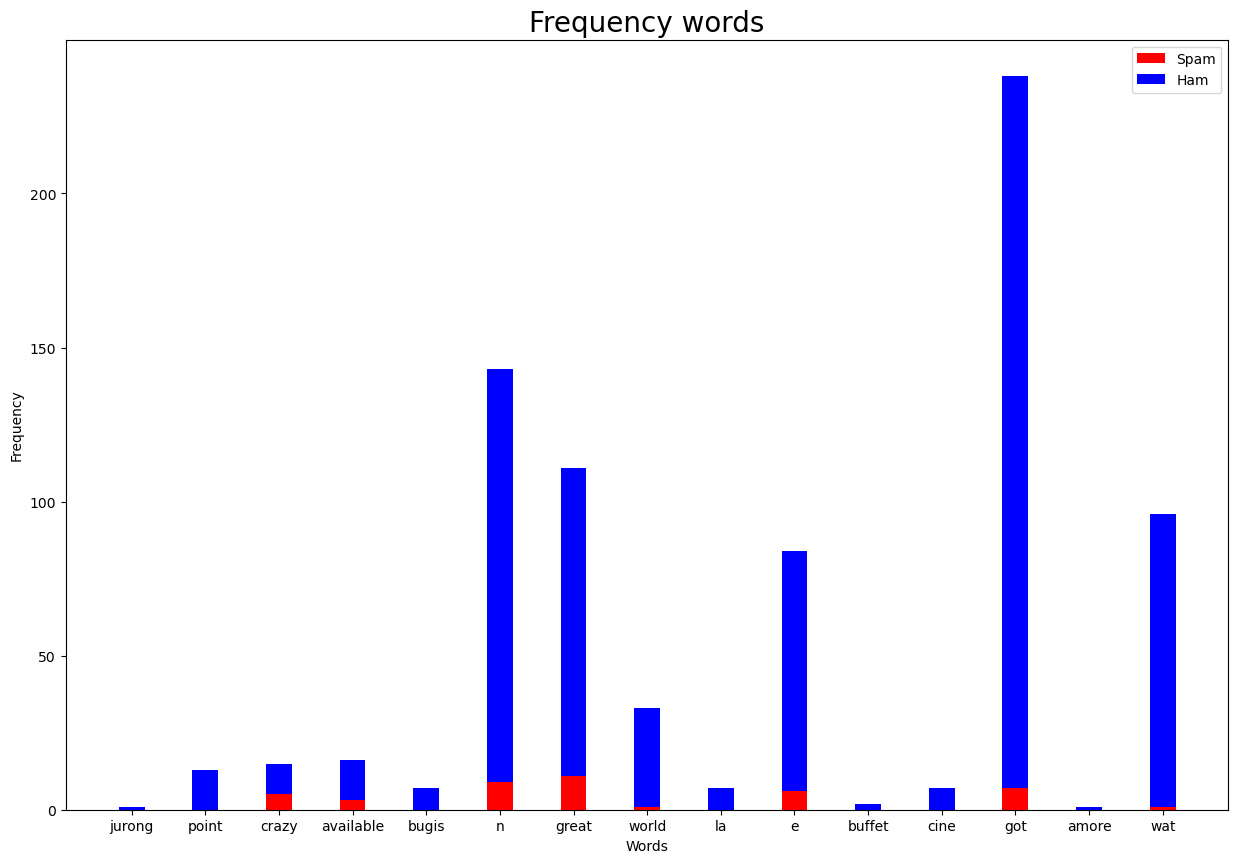

In [12]:
bar_width=0.35
alpha = 1
plt.figure(figsize=(15,10))

p1 = plt.bar(index, words_cound_df1['spam'], bar_width, color='r', alpha=alpha, label="spam")
p2 = plt.bar(index, words_cound_df1['ham'], bar_width, color='b', alpha=alpha, label="ham", bottom=words_cound_df1['spam'])

plt.title("Frequency words", fontsize=20)
plt.xlabel("Words", fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(index, words_cound_df1['words'], fontsize=10)
plt.legend((p1,p2), ('Spam', 'Ham'), fontsize=10)
plt.show()

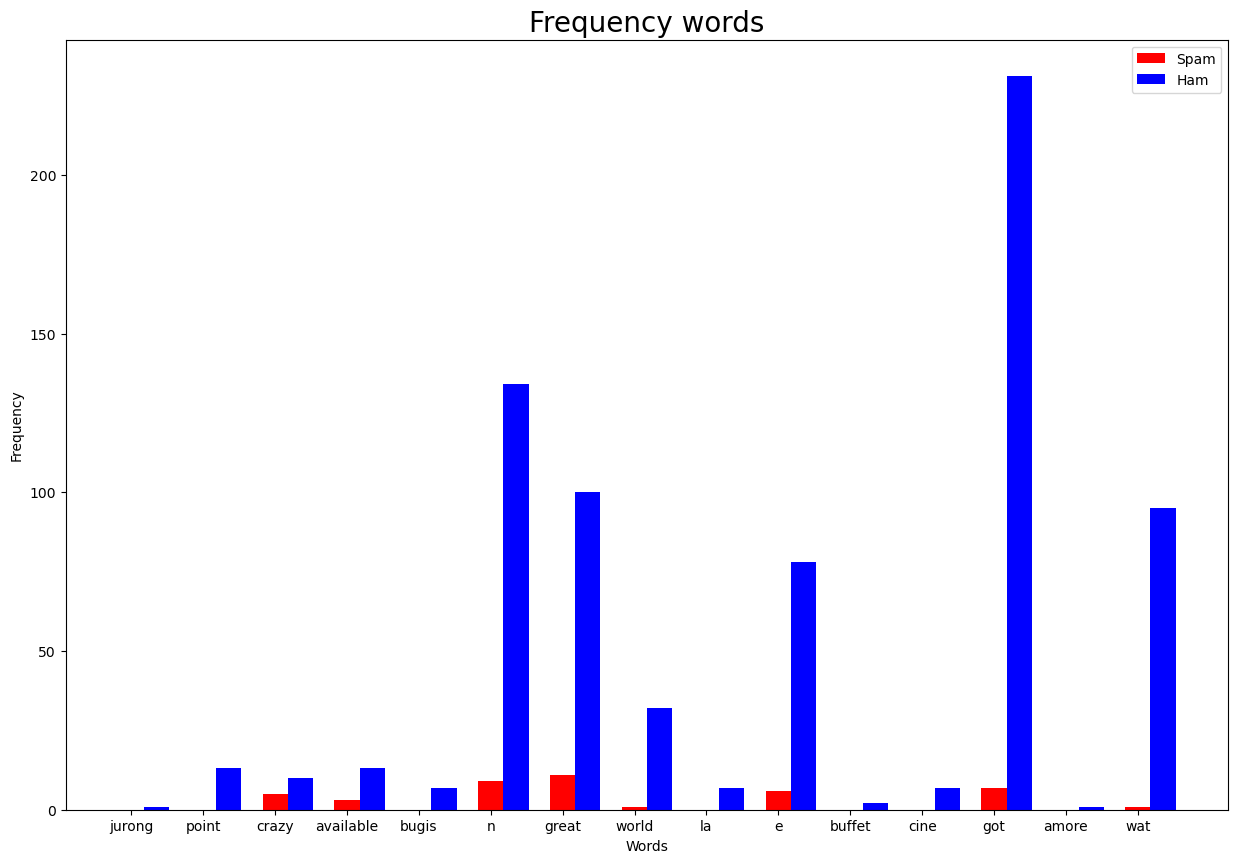

In [13]:
bar_width=0.35
alpha = 1
plt.figure(figsize=(15,10))

p1 = plt.bar(index, words_cound_df1['spam'], bar_width, color='r', alpha=alpha, label="spam")
p2 = plt.bar(index+bar_width, words_cound_df1['ham'], bar_width, color='b', alpha=alpha, label="ham")

plt.title("Frequency words", fontsize=20)
plt.xlabel("Words", fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(index, words_cound_df1['words'], fontsize=10)
plt.legend((p1,p2), ('Spam', 'Ham'), fontsize=10)
plt.show()

In [14]:
words_cound_df2 = words_cound_df.sort_values(by=['sum'], ascending=False)
words_cound_df2
words_cound_df = sorted(words_cound_df[:15])
print(words_cound_df2)
#spam_Ratio prior of the word
#prob spam evidence prior
#posterior


            words  spam  ham   sum  spam_ratio
19              u   147  972  1119    0.131367
23              2   173  305   478    0.361925
113            im    13  458   471    0.027601
201            ur   144  240   384    0.375000
46           dont    22  268   290    0.075862
...           ...   ...  ...   ...         ...
5036       length     0    1     1    0.000000
5035  09061743810     1    0     1    1.000000
5034          amk     0    1     1    0.000000
5033         arul     0    1     1    0.000000
9270     bitching     0    1     1    0.000000

[9271 rows x 5 columns]


#Ahmad: Vectorizing the data
<iframe src="https://www.kaggle.com/embed/dilip990/spam-ham-detection-using-naive-bayes-classifier?cellIds=36&kernelSessionId=93128403" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Spam/ham detection using Naive bayes Classifier"></iframe>

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
#construct matrix col: message row:words cell: spam or not
bow_transformer = CountVectorizer().fit(data['clean_text'])
# print(bow_transformer.vocabulary_)


Now, our transformer is ready to transform any massege to matrix
lets take an example and try to see the vector representation of the 100th massege

In [16]:
message_100 = str(data['clean_text'][99])
print(message_100)
print(f'the massege is: {message_100}')
print('the vector rep is:')
message_100_bow = bow_transformer.transform([message_100])

print(bow_transformer.inverse_transform(message_100_bow))


dont text anymore
the massege is: dont text anymore
the vector rep is:
[array(['anymore', 'dont', 'text'], dtype='<U50')]


as we see, the massege: "dont text anymore", has three distinct words, which are the word number 1204,2867 and 8057 respectivly.
lets transform all the masseges in our dataset and see the shape of the vector represintation 

In [17]:
messages_bow = bow_transformer.transform(data['clean_text']) # matrix
print('Shape of Sparse Matrix: (messages, uniqe words)',messages_bow.shape)
print('Amount of non-zero occurences:',messages_bow.nnz)
print('Number of words:',np.sum(messages_bow))


Shape of Sparse Matrix: (messages, uniqe words) (5572, 9237)
Amount of non-zero occurences: 42215
Number of words: 44003


this shape means that, we have 5572 masseges with 9237 distinct words

### Ahmad: Generating TF-IDF
*TF-IDF is a term to show how important this word in the document, and it depends on two terms, which are FT and IDF*

  - TF = (Number of times term t appears in a document) / (Total number of terms in the document).
  - IDF = log_e(Total number of documents / Number of documents with term t in it).
  
  -TF-IDF = TF * IDF
* This encoding brings about the importance of each word in our dataset

*Lets see what's the tf-idf representation of the 100th messege now*

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf100 = tfidf_transformer.transform(message_100_bow)
print(tfidf100)

  (0, 8057)	0.46780811410953527
  (0, 2867)	0.42489853856514537
  (0, 1204)	0.7749947098519342


Now, let's apply this method on all the messages that we have

In [19]:
messages_tfidf= tfidf_transformer.transform(messages_bow) #dataset transformed
print(messages_tfidf.shape)

(5572, 9237)


# Train

In [20]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf,data['class'])
print('predicted:\n',spam_detect_model.predict(tfidf100)[0])
print('expected:\n',data['class'][99])
print()


predicted:
 ham
expected:
 ham



Trying out different models to see the performance of each.

## VERSION 1
TRANSFORM WORDS -> SPLIT DATA -> INVERSE TRANSFORM -> PRINT, COMPARE REAL AND PREDICTION, AND COMPUTE THE ACCURACY

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import BaseEnsemble
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from colorama import Fore
import numpy as np
from sklearn.datasets import make_classification  # Samples used for training the models
class ml_models_1():
    "enter the training and test set."
    "baseline: MB Matrix: messages_tfidf"
    def __init__(self,data,transformer,classifier = "MB",cls = data["class"]): #Matrix:messages_tfidf
        """classifiers: baseline MB"""
        self.data = data
        self.classifier = classifier
        self.cls = cls
        #split Matrix of words into training and test set with a of ratio 0.2
        self.transformer = CountVectorizer().fit(data)
        
        self.Matrix = self.transformer.transform(data)
        if transformer =="tfitf":
            self.transformer = TfidfTransformer().fit(self.Matrix)
            self.Matrix = self.transformer.transform(data)
            
        X_train, X_test, y_train, y_test = train_test_split(self.Matrix.toarray(),cls,shuffle=True,test_size = 0.2, random_state=0)
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        

    
####fit the model with training set and compute accuracy and confusion matrix over the test set###
    def fit(self):
        """output [prediction,accuracy,confusion]"""
        "select the model"
        "Enter a matrix of labels-row  words-col "
        if self.classifier == "MB":
            self.clf = MultinomialNB()
        elif self.classifier == "NB":
            self.clf = GaussianNB()
        elif self.classifier == "RF":
            self.clf = RandomForestClassifier() #got 0.98 
        elif self.classifier == "KNN":
            self.clf = KNeighborsClassifier()
        elif self.classifier == "SVM":
            self.clf = SVC()
        self.clf.fit(self.X_train,self.y_train)
        self.test_pred = self.clf.predict(self.X_test)
        

        """Accuracy,specificity and Confusion matrix"""
        self.confusion = metrics.confusion_matrix(self.y_test, self.test_pred)
        #TODO Precision Recall F1 score and also put them in return
        tn,fp,fn,tp = self.confusion.ravel()
        specificity = tn/(tn+fp)
        recall = tp/(tp+fn)
        print(f"--------------------------------{self.classifier}----------------------------------------------")
        print("Number of mislabeled messages out of a total %d: %d" % (self.X_test.shape[0], (self.y_test != self.test_pred).sum()))
        print("Accuracy on the test set: {:.2}".format(metrics.accuracy_score(self.y_test, self.test_pred)))        
        print("recall(ratio of spams correctly classified tp/tp+fn) on the test set: {:.2}".format((recall)))
        print("Specificity(ratio of hams correctly classified tn/tn+fp) on the test set: {:.2}".format((specificity)))
        print(f"Confusion Matrix:\n {self.confusion}")
        print(f"--------------------------------{self.classifier}----------------------------------------------\n")
        self.score = metrics.accuracy_score(self.y_test, self.test_pred)
        return [self.test_pred,self.score,self.confusion]
    
    
####message predict ->input:a string text ####
    def miss_class(self):
        self.test_pred.inverse_transform()


    def msg_predict(self,msg):
        
        #construct matrix col: message row:words cell: spam or not
        msg_bow = self.transformer.transform([(msg).lower()]) # transform the message all to the lowercases
        msg_transformed = tfidf_transformer.transform(msg_bow)
        self.text_pred = self.clf.predict(msg_transformed.toarray())
        return self.text_pred
        # print(bow_transformer.vocabulary_)
###2 predictions -> 1.test set 2.text introduced


    def plot_confusion(self,save = ""):
        """if save == "true" ->store the image """
        #confusion matrix
        labels = ['strongly neg.', 'negative', 'neutral', 'positive', 'strongly pos.']
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cm = ax.matshow(self.confusion)
        # plot the title, use y to leave some space before the labels
        plt.title(f"{self.classifier} ", y=1.2)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
                    rotation_mode="anchor")
        
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        # Loop over data dimensions and create text annotations.
            # Create colorbar
        plt.plot()
        fig.colorbar(cm)
        if save == "True":
            #TODO Save the image, adaptive to each file 
            plt.savefig(f"{self.classifier} conf_matrix.jpg")

        return

Trying out different models to see the performance of each.

## VERSION 2
SPLIT DATA -> TRANSFORM WORDS -> INVERSE TRANSFORM -> PRINT, COMPARE REAL AND PREDICTION, AND COMPUTE THE ACCURACY

In [22]:
import random
random.seed(0)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import BaseEnsemble
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from colorama import Fore
import numpy as np
from tabulate import tabulate
from sklearn.datasets import make_classification  # Samples used for training the models
class ml_models_v2():
    "enter the training and test set."
    "baseline: MB Matrix: messages_tfidf, KNN accuracy: .9"
    def __init__(self,data,transformer,classifier,cls = data["class"],parameters = None): #Matrix:messages_tfidf
        """classifiers: baseline MB"""
        self.data = data
        self.classifier = classifier
        self.cls = cls
        self.clf = classifier
        self.transformer_type = transformer
        #split Matrix of words into training and test set with a of ratio 0.2
        X_train, X_test, y_train, y_test = train_test_split(data,cls,shuffle=True,test_size = 0.2,random_state = 0)
        
        self.cv_transformer = CountVectorizer().fit(X_train)
        
        self.Matrix = self.cv_transformer.transform(X_train)
        if transformer =="tfidf":
            self.tfidt_transformer = TfidfTransformer().fit(self.Matrix)
            self.Matrix = self.tfidt_transformer.transform(self.Matrix)
        if parameters != None:
            self.clf = GridSearchCV(self.clf,parameters)


        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.words = set(self.X_train)

    def __len__(self):
        return len(self.data)
####fit the model with training set and compute accuracy and confusion matrix over the test set###

    def fit(self):
        random.seed(0)
        """output [prediction,accuracy,confusion]"""
        "select the model"
        "Enter a matrix of labels-row  words-col "
            

        transformed_X_test = self.cv_transformer.transform(self.X_test)
        if self.transformer_type == 'tfidf':
            transformed_X_test =  self.tfidt_transformer.transform(transformed_X_test) # transform our data to tfidt

        def get_var_name(variable):
            globals_dict = globals()
            return [var_name for var_name in globals_dict if globals_dict[var_name] is variable]
        
        if get_var_name(self.clf) == ["NB"]:
            self.clf.fit(self.Matrix.toarray(),self.y_train)
            self.test_pred = self.clf.predict(transformed_X_test.toarray())
        else:
            self.clf.fit(self.Matrix,self.y_train)
            self.test_pred = self.clf.predict(transformed_X_test)
        

        """Accuracy,specificity and Confusion matrix"""
        self.confusion = metrics.confusion_matrix(self.y_test, self.test_pred)
        #TODO Precision Recall F1 score and also put them in return
        tn,fp,fn,tp = self.confusion.ravel()
        self.specificity = tn/(tn+fp)
        self.recall = tp/(tp+fn)
        print(f"--------------------------------{self.classifier}----------------------------------------------")
        print("Number of mislabeled messages out of a total %d: %d" % (self.X_test.shape[0], (self.y_test != self.test_pred).sum()))
        print("recall(ratio of spams correctly classified tp/tp+fn) on the test set: {:.2}".format((self.recall)))
        print("Specificity(ratio of hams correctly classified tn/tn+fp) on the test set: {:.2}".format((self.specificity)))
        print("Accuracy on the test set: {:.2}".format(metrics.accuracy_score(self.y_test, self.test_pred)))
        print(f"Confusion Matrix:\n {self.confusion}")
        print(f"--------------------------------{self.classifier}----------------------------------------------\n")
        self.score = metrics.accuracy_score(self.y_test, self.test_pred)
        return [self.test_pred,self.recall,self.specificity,self.score,self.confusion]
    


    def miss_class(self):
        tabulate_list = []
        counts = 0
        total_counts = 0.000001 # Introduce a tiny number to avoid inf.
        
        for m,e,p in zip(self.X_test,self.y_test,self.test_pred):
            count = 0
            if(e != p):
                for i in self.words: #count the number of the known words
                    if i in m:
                        count+=1
                        counts +=1
                
                lst = [m,e,p,len(m.split()),count]
                total_counts +=len(m.split())
                tabulate_list.append(lst)
                # print(f'{m}, {e}, {p}')
        print(tabulate(tabulate_list,headers = ["message","expectated","prediction","length","known words"]))
        print("")
        print(f"in total: {len(tabulate_list)} miss classified | known words ratio: {round(counts/(total_counts),3)}")
        # version 3 added -- 
        self.KWR = counts/(total_counts)
        self.phi1 = round((10*self.recall) ** (1-self.KWR),3)
        self.phi2 = round(np.log(1-self.KWR+0.5)*(self.recall),3) 
        print("score function phi_v1 =",self.phi1)
        print("score function phi_v2 =",self.phi2)
        return self.phi1,self.phi2

        
####message predict ->input:a string text ####
    def msg_predict(self,msg):
        #construct matrix col: message row:words cell: spam or not
        transformed = self.cv_transformer.transform([msg])
        if self.transformer_type == 'tfidf':
            transformed =  self.tfidt_transformer.transform(transformed)
            
        # print(bow_transformer.vocabulary_)
        self.text_pred = self.clf.predict(transformed.toarray())
        return self.text_pred

###2 predictions -> 1.test set 2.text introduced
    def plot_confusion(self,save = ""):
        """if save == "true" ->store the image """
        #confusion matrix
        labels = ['strongly neg.', 'negative', 'neutral', 'positive', 'strongly pos.']
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cm = ax.matshow(self.confusion)
        # plot the title, use y to leave some space before the labels
        plt.title(f"{self.classifier} ", y=1.2)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
                    rotation_mode="anchor")
        
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        # Loop over data dimensions and create text annotations.
            # Create colorbar
        plt.plot()
        fig.colorbar(cm)
        if save == "True":
            #TODO Save the image, adaptive to each file 
            plt.savefig(f"{self.classifier} conf_matrix.jpg")


            
        return

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import BaseEnsemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
#load classifiers
MB = MultinomialNB()
NB = GaussianNB()
RF = RandomForestClassifier()
SVC = SVC()
KNN = KNeighborsClassifier()
dct ={}
classifier =[]
def Read_algorithm(classifier,data=data["clean_text"],parameters=None):
    m = ml_models_v2(data,"",classifier = classifier,parameters = parameters)
    test_pred,recall,specificity,accuracy,conf = m.fit()
    phi1,phi2 = m.miss_class()
    return phi1,phi2,recall

## Some illustrative examples of the performance of each classifier without previously tuning with grid search

In [23]:
# conf_matrix :
#       tn, fp
#       fn, tp
dct["NB"] = Read_algorithm(NB)


--------------------------------GaussianNB()----------------------------------------------
Number of mislabeled messages out of a total 1115: 144
recall(ratio of spams correctly classified tp/tp+fn) on the test set: 0.89
Specificity(ratio of hams correctly classified tn/tn+fp) on the test set: 0.87
Accuracy on the test set: 0.87
Confusion Matrix:
 [[824 125]
 [ 19 147]]
--------------------------------GaussianNB()----------------------------------------------

message                                                                                                                                     expectated    prediction      length    known words
------------------------------------------------------------------------------------------------------------------------------------------  ------------  ------------  --------  -------------
wereare free nalla adi entey nattil kittum                                                                                                  ham        

In [24]:
dct["KNN"] = Read_algorithm(KNN)

--------------------------------KNeighborsClassifier()----------------------------------------------
Number of mislabeled messages out of a total 1115: 111
recall(ratio of spams correctly classified tp/tp+fn) on the test set: 0.33
Specificity(ratio of hams correctly classified tn/tn+fp) on the test set: 1.0
Accuracy on the test set: 0.9
Confusion Matrix:
 [[949   0]
 [111  55]]
--------------------------------KNeighborsClassifier()----------------------------------------------

message                                                                                                                                        expectated    prediction      length    known words
---------------------------------------------------------------------------------------------------------------------------------------------  ------------  ------------  --------  -------------
85233 freeringtonereply real                                                                                                   

In [25]:
dct["SVC"] = Read_algorithm(SVC)

# m.msg_predict("sdf")

--------------------------------SVC()----------------------------------------------
Number of mislabeled messages out of a total 1115: 34
recall(ratio of spams correctly classified tp/tp+fn) on the test set: 0.8
Specificity(ratio of hams correctly classified tn/tn+fp) on the test set: 1.0
Accuracy on the test set: 0.97
Confusion Matrix:
 [[949   0]
 [ 34 132]]
--------------------------------SVC()----------------------------------------------

message                                                                                                                                        expectated    prediction      length    known words
---------------------------------------------------------------------------------------------------------------------------------------------  ------------  ------------  --------  -------------
85233 freeringtonereply real                                                                                                                   spam          ham  

In [26]:
dct["RF"] = Read_algorithm(RF)


--------------------------------RandomForestClassifier()----------------------------------------------
Number of mislabeled messages out of a total 1115: 39
recall(ratio of spams correctly classified tp/tp+fn) on the test set: 0.77
Specificity(ratio of hams correctly classified tn/tn+fp) on the test set: 1.0
Accuracy on the test set: 0.97
Confusion Matrix:
 [[948   1]
 [ 38 128]]
--------------------------------RandomForestClassifier()----------------------------------------------

message                                                                                                                                     expectated    prediction      length    known words
------------------------------------------------------------------------------------------------------------------------------------------  ------------  ------------  --------  -------------
85233 freeringtonereply real                                                                                                     

In [27]:
dct["MB"] = Read_algorithm(MB)


--------------------------------MultinomialNB()----------------------------------------------
Number of mislabeled messages out of a total 1115: 23
recall(ratio of spams correctly classified tp/tp+fn) on the test set: 0.89
Specificity(ratio of hams correctly classified tn/tn+fp) on the test set: 1.0
Accuracy on the test set: 0.98
Confusion Matrix:
 [[945   4]
 [ 19 147]]
--------------------------------MultinomialNB()----------------------------------------------

message                                                                                                                                     expectated    prediction      length    known words
------------------------------------------------------------------------------------------------------------------------------------------  ------------  ------------  --------  -------------
wereare free nalla adi entey nattil kittum                                                                                                  ham    


## Some observations: 
    1. When less is the recall of the classifier, for instance the NB, the greater is the known words ratio. As there are more considerations in incorrect words.
    2. When the recall ratio is high, for instance the SVC, then the known words ratio reduce to around 0.3 - 0.4. 
    3. For those of high recall ratio, they tend to incorrectly classify the sentences from <code> <i> spam to ham </i> <code> when there is little knowledge about some words. This is mainly due to the fact that the dominant words are more likely to be those of no meaningful words such as: "This", "me", "hello"...etc when there are little words recorded in our database from the sentence.
    

## Proposition:
    1. Based on the observations, assuming that both known words ratio and the recall ratio they are monotonic functions such that when better is the performance of the model, less is the known words ratio and more is the recall ratio. we offer a function that may be constructive to target the problem: phi(theta_hat) = a_0 (10*recall ratio) ** a_1(1-known words ratio) where a_0 and a_1 are weights from [0,1].

<BarContainer object of 5 artists>

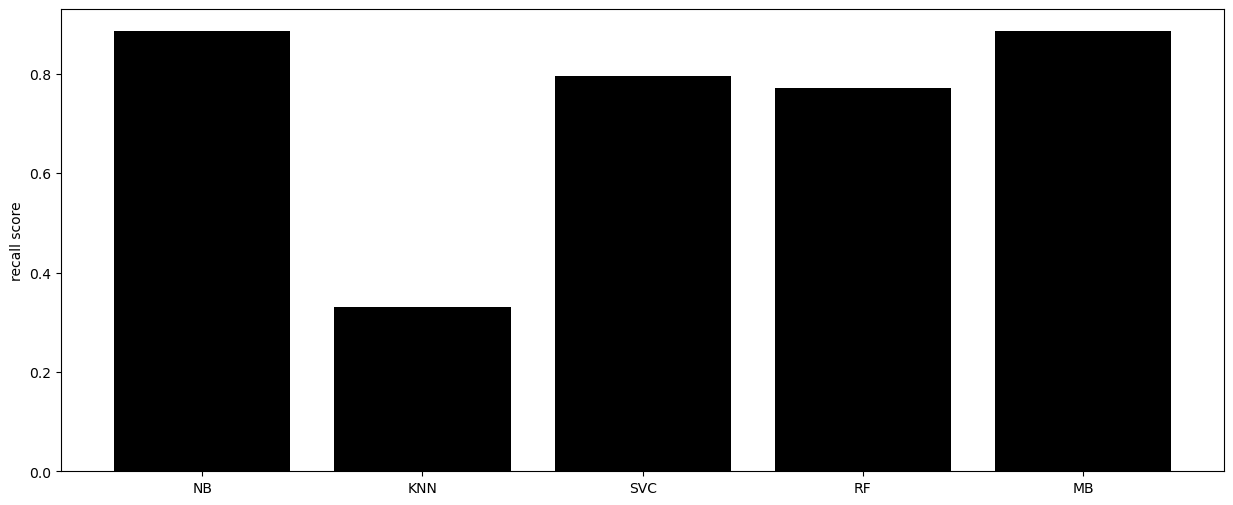

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.ylabel("recall score")
plt.bar([ str(i) for i in dct.keys()], [i[2] for i in dct.values()], color='black')

<BarContainer object of 5 artists>

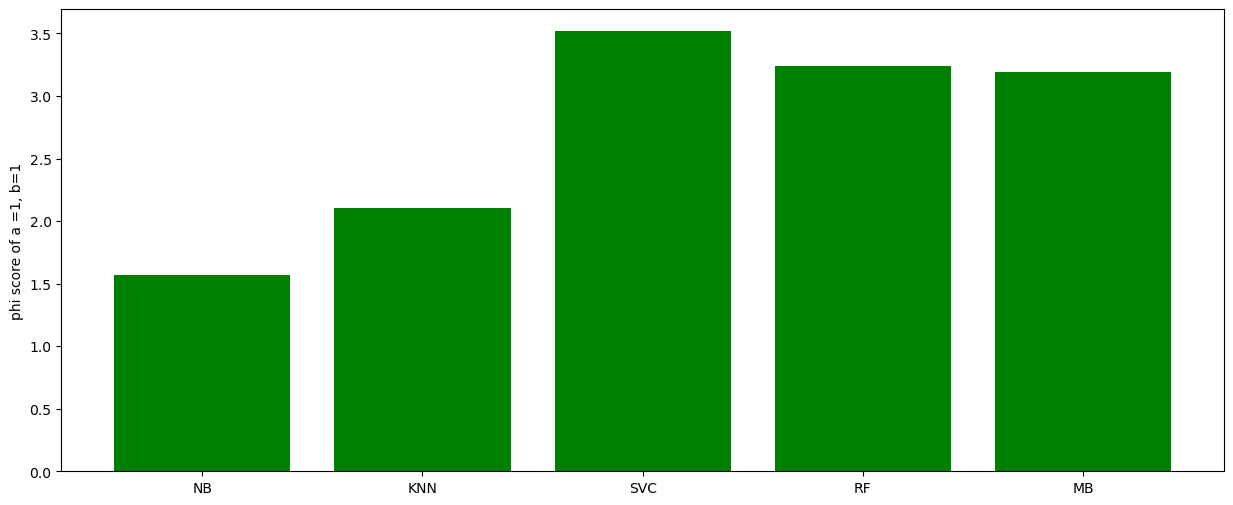

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.ylabel("phi score of a =1, b=1")
plt.bar([ str(i) for i in dct.keys()], [i[0] for i in dct.values()], color='g')

<BarContainer object of 5 artists>

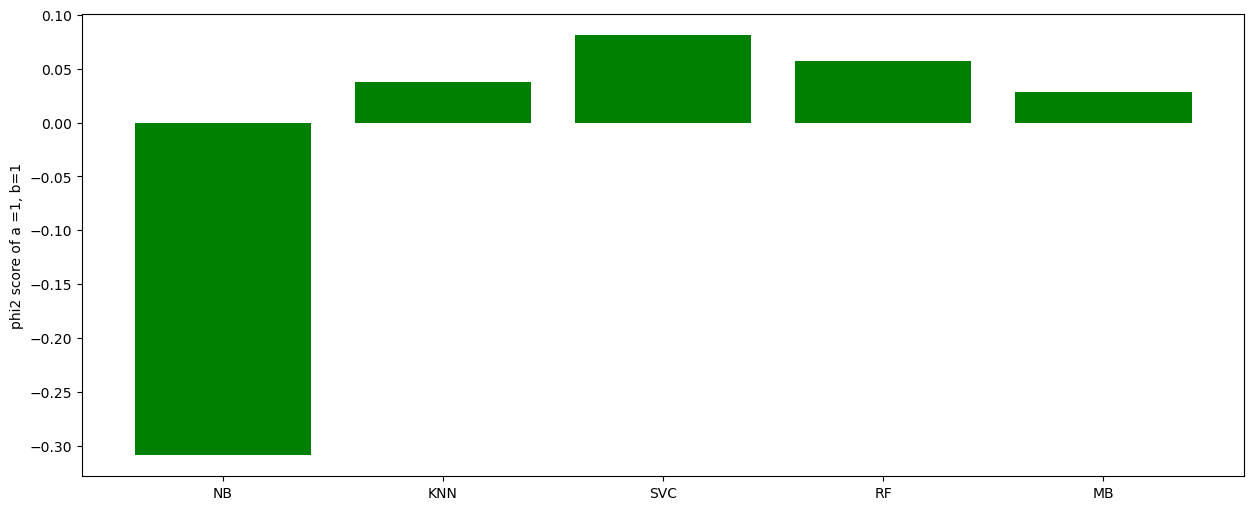

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.ylabel("phi2 score of a =1, b=1")
plt.bar([ str(i) for i in dct.keys()], [i[1] for i in dct.values()], color='g')

## Observations2: From the above plot it is distinguishable that MultinomialNB, SVC and RandomForest have the similar and more competitive phi score as they are computationally more powerful algorithm that learn more details than the others. 

## Assuming that they are in fact better algorithms in email classification task, we will only select them to tune the hyperparameters with Grid search.

In [35]:
dct["tunedSVC"] = Read_algorithm(SVC,parameters = {'kernel':('linear', 'rbf',"sigmoid"), 'C':[1,2,3,4,5,10],"degree":[1,2,3,4]})
dct["tunedRF"] = Read_algorithm(RF,parameters ={'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [8,9,10,11,12,13,14,15],
    'criterion' :['gini', 'entropy']})


--------------------------------SVC()----------------------------------------------
Number of mislabeled messages out of a total 1115: 30
recall(ratio of spams correctly classified tp/tp+fn) on the test set: 0.84
Specificity(ratio of hams correctly classified tn/tn+fp) on the test set: 1.0
Accuracy on the test set: 0.97
Confusion Matrix:
 [[945   4]
 [ 26 140]]
--------------------------------SVC()----------------------------------------------

message                                                                                                                                                            expectated    prediction      length    known words
-----------------------------------------------------------------------------------------------------------------------------------------------------------------  ------------  ------------  --------  -------------
85233 freeringtonereply real                                                                                             

KeyboardInterrupt: 

<BarContainer object of 5 artists>

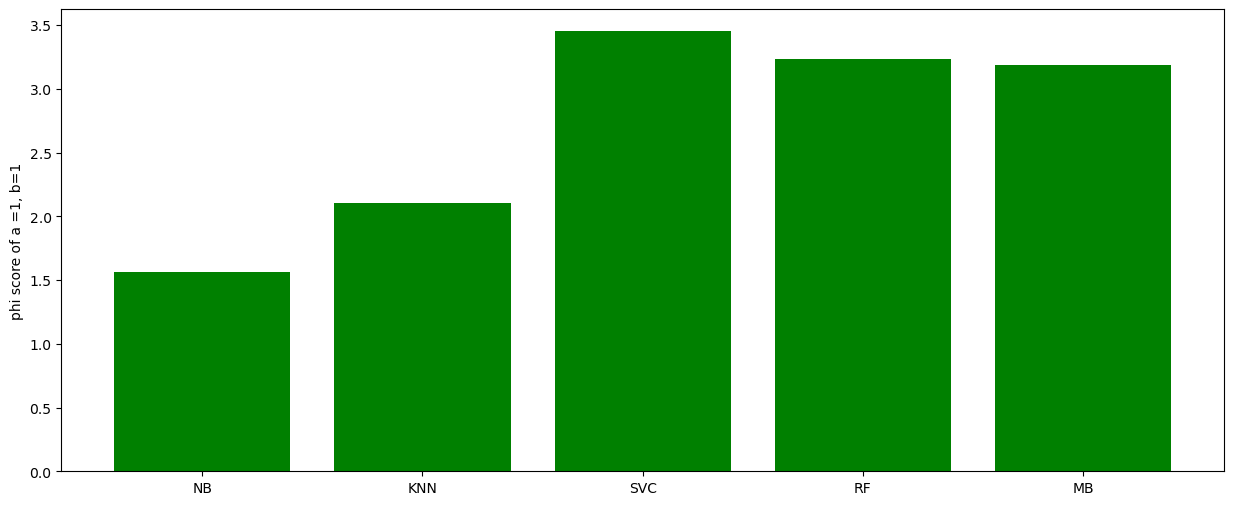

In [ ]:
plt.figure(figsize=(15,6))
plt.ylabel("phi score of a =1, b=1") 
plt.bar([ str(i) for i in dct.keys()], [i[0] for i in dct.values()], color='g')

TODO LIST
BEFORE THE CLASS
1.how many known words + ensemble learning PAI   observation: in each knit, the known words ratio changes because each time the missclassified sentences are different. ->problem? ->might because we have done something run with model  # what is the difference between NB and MB in our case
2. finish the web AHMED
3. pdf SEUNJOO
4. scrapping data DISCUSS TOGETHER PAI

CLASS
1. topic model
2. play with the website

## At first we tried with messages_tfidf which is a way to give the weights to the probability our messages. And the output of confussion matrix is 

In [ ]:
#TODO change to cross validation because our dataset is too small
#TODO try out different sort of encoding for example one-hot encoding
#TODO Seungjoo: Data Visualization
#TODO Pai: use different ML models: MB,NB, logistic regression, RandomForest, Ensemble Learning, SVM different Kernel and different SVC
#TODO Pai: use different NLP Deep Learning models: Bert, LSTM, transformer
#TODOhttps://reader.elsevier.com/reader/sd/pii/S1877050921007493?token=EF241DBFDF5D3E693123D87787B1D0423C4311E090E1A9A019C380F3A4ADDFB0B348CDF48181003D6E970301F8055E3B&originRegion=eu-west-1&originCreation=20221122103544
#TODOtransfer learning https://arxiv.org/ftp/arxiv/papers/2202/2202.03480.pdf
#TODOhttps://www.researchgate.net/publication/351646376_A_Spam_Transformer_Model_for_SMS_Spam_Detection  ---->Imitate table and ways of doing research.
#TODO TENSORBOARD

#TODO Ahmad: build the website.



#TODO Database and Website:
DATABASE: 
        1ºdataset:word classification and we keep adding new data once the sentence is classified in the 2º page by the users.

        2º dataset: store the words that are unknown familiar yet. 
                    5 columns: First -> word  Second-> ham  Third-> Spam Fourth-> time of appearance Fifth->Spam ratio
                    when the time of appearance is more than lets say 1000 times, the word will be passed to the 1ºdataset.
        
        3º dataset: classified sentences.
        4º dataset: manually classified sentences.


WEBSITE:
front-end:
    1º page:1) show the data visualization of each model's performance so far. e.i. Accuracy and confusion matrix
            2) window for typing in the message and classify it.
                If there is an unknown word inside, as in this case: "Hult International Business School offers a cutting edge online business course with a 20% discount" 
                %Here as we have never seen the word "cuttig edge". We store it in the 2º dataset. After several inputs, lets say, when the time of apperance reaches to 1000, we then consider the word as a spam or ham depending on the spam ratio.
                And if the sentence contains 90% of already known words from 1º dataset, the algorithm classify it omitting the unkown words. Else, we have to store it in the 4º dataset that need to be classfied manually.
                
                The example sentence "Hult International Business School offers a cutting edge online business course with a 20% discount",

                In case that the words are all known of the sentence introduced, the algorithm will directly classify the sentence and update 1º dataset.
            
    2º page: Let the users classify for us the message and store it in our database.